In [1]:
import sys
import pickle
import matplotlib.pyplot
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [4]:
len(data_dict)

146

In [5]:
# Remove Outliers
data_dict.pop("TOTAL")
data_dict.pop("THE TRAVEL AGENCY IN THE PARK")
data_dict.pop("LOCKHART EUGENE E")

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [6]:
len(data_dict)

143

In [7]:
def get_quantifiable_count(key, is_poi = None):
    count = 0
    for k, v in data_dict.items():
        if is_poi is not None:
            if v[key] != 'NaN' and v['poi'] == is_poi:
                count += 1
        else:
            if v[key] != 'NaN':
                count += 1
    return count

poi_count = get_quantifiable_count('poi', True)
non_poi_count = get_quantifiable_count('poi', False)

poi_count

18

### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

The goal of this project is to identify Enron employees who may have committed fraud based on public Enron financial and email dataset. We identify the employees who participated in the fraud as person of interest(POIs).

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

Machine learning are veryuseful for accomplishing this goal because they can process the dataset to identify person of interests much faster than humans and to spot trends where humans would have a hard time realizing.

Here is some background of the dataset

### Employees
There are 146 employees in the Enron Dataset. 18 of them are POIs.

### Features
There are 21 features total: 14 are financial features, 6 email features, and 1 poi feature. The features are broken down as follows:

**financial features**: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars) 

**email features**: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

**POI label**: [‘poi’] (boolean, represented as integer). This feature idicates whether or not the employee is the person of interest.

### Missing Features

20 out of 21 features have missing values idicated by "NaN" with the exception of POI label. The missing values are replaced with 0 using the feature format.

### Outliers

From graphing different variations of features, each feature has a huge outlier generated by "TOTAL". I removed those immediately. There is a non-employee in the dataset belonging to "THE TRAVEL AGENCY IN THE PARK". I removed it as well.


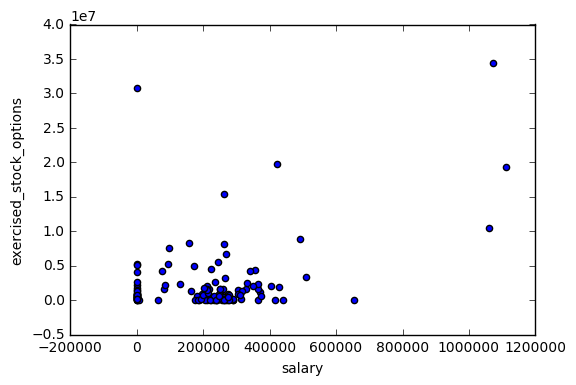

In [8]:
features = ['salary', 'exercised_stock_options']
data = featureFormat(data_dict, features)


for point in data:
    salary = point[0]
    exercised_stock_options = point[1]
    matplotlib.pyplot.scatter( salary, exercised_stock_options )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("exercised_stock_options")
matplotlib.pyplot.show()

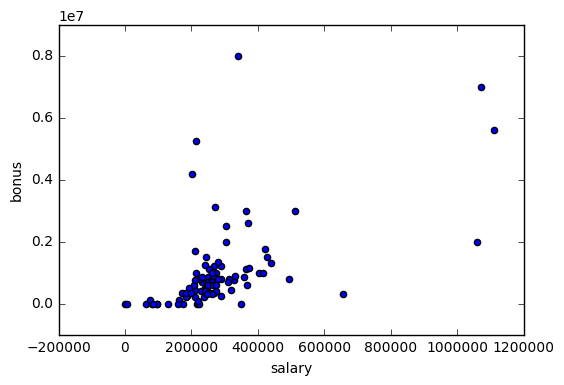

In [9]:
features = ['salary','bonus']
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [16]:
# Create New Features
for name in data_dict:
    data_point = data_dict[name]
    
    if data_point['bonus']!= 'NaN' and data_point['salary'] != 'NaN' and data_point['salary'] != 0:
        #bonus to salary ratio
        bonus = float(data_point['bonus'])
        salary = float(data_point['salary'])
        data_point["bonus to salary ratio"] = bonus/salary
    else:
        data_point["bonus to salary ratio"] ='NaN'
        
    # total emails
    to_messages = data_point['to_messages']
    from_messages = data_point['from_messages']
    data_point['total messages'] = to_messages + from_messages
        
    
    if data_point['total messages'] != 'NaN' and  data_point['total messages'] != 0 and data_point['from_poi_to_this_person'] != 'NaN' and data_point['from_this_person_to_poi'] != 'NaN':
        # POI interation ratio
        total_messages = float(data_point['total messages'])
        from_poi = float(data_point['from_poi_to_this_person'])
        to_poi = float(data_point['from_this_person_to_poi'])

        data_point['from_poi_to_this_person_ratio'] = from_poi / total_messages
        data_point['from_this_person_to_poi_ratio'] = to_poi / total_messages
        data_point['Total POI Interaction Ratio'] = (from_poi + to_poi)/total_messages
    
    else:
        data_point['from_poi_to_this_person_ratio'] = "NaN"
        data_point['from_this_person_to_poi_ratio'] = "NaN"
        data_point['Total POI Interaction Ratio'] = "NaN"

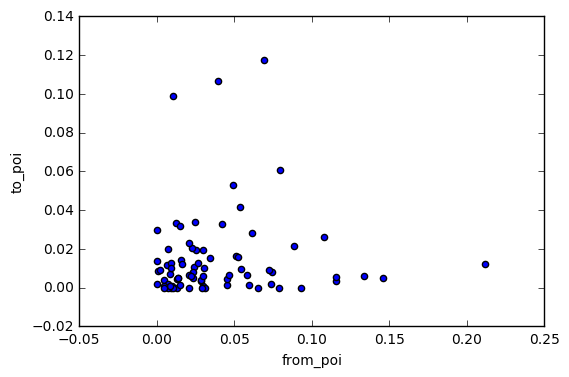

In [17]:
features = ['from_poi_to_this_person_ratio','from_this_person_to_poi_ratio']
data = featureFormat(data_dict, features)

for point in data:
    from_poi = point[0]
    to_poi = point[1]
    matplotlib.pyplot.scatter(from_poi, to_poi )

matplotlib.pyplot.xlabel("from_poi")
matplotlib.pyplot.ylabel("to_poi")
matplotlib.pyplot.show()

In the graph shown above, there are a few persons that have high ratios of from_poi and to_poi. My hypothesis is that those individuals could be POIs.

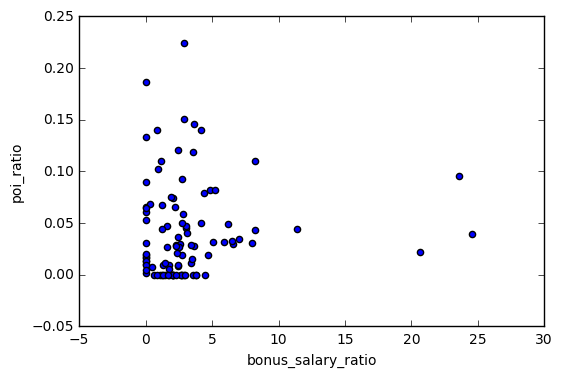

In [18]:
features = ['bonus to salary ratio','Total POI Interaction Ratio']
data = featureFormat(data_dict, features)

for point in data:
    bonus_salary_ratio = point[0]
    poi_ratio = point[1]
    matplotlib.pyplot.scatter(bonus_salary_ratio, poi_ratio )

matplotlib.pyplot.xlabel("bonus_salary_ratio")
matplotlib.pyplot.ylabel("poi_ratio")
matplotlib.pyplot.show()

There are a few outliers: one that has very high poi_ratio and low bonus_salary_ratio, and three that has low poi_ratio and high bonus_salary_ratio. I predict that either one of them is a poi.

In [52]:
my_dataset = data_dict
features_list = ['poi', 'bonus to salary ratio', 'Total POI Interaction Ratio',
                'salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 
                 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                 'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 
                 'from_this_person_to_poi', 'shared_receipt_with_poi' ]
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [53]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
kbest = SelectKBest(k=8)
train_new= kbest.fit_transform(features,labels)
print kbest.get_support()

[ True False  True False False False  True False  True  True False  True
 False  True  True False False False False False False]


In [47]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [37]:
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn.metrics import recall_score, precision_score
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 50, 100]}
clf1 = SVC(kernel = 'linear', C = 1)
#clf1 = grid_search.GridSearchCV(svr, parameters)
clf1.fit(features_train, labels_train)
clf1.predict(features_test)
pred1 = clf1.predict(features_test)
print "Precision:", precision_score(labels_test, pred1)
print "Recall:", recall_score(labels_test, pred1)
print "Accuracy:", clf1.score(features_test, labels_test)

Precision: 0.0
Recall: 0.0
Accuracy: 0.766666666667


In [38]:
from sklearn.neighbors import KNeighborsClassifier
#parameters = {'n_neighbors':[5, 10, 15, 20, 25]}
clf2 = KNeighborsClassifier(n_neighbors=10)
#clf2 = grid_search.GridSearchCV(kn, parameters)
clf2.fit(features_train,labels_train)
#clf2.best_params_
pred2 = clf2.predict(features_test)
print "Precision:", precision_score(labels_test, pred2)
print "Recall:", recall_score(labels_test, pred2)
print "Accuracy:", clf2.score(features_test, labels_test)

Precision: 0.0
Recall: 0.0
Accuracy: 0.766666666667


I think I need feature scaling for SVM and K nearest neighbors.

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(min_samples_split=2)
clf3.fit(features_train,labels_train)
pred3 = clf3.predict(features_test)
print "Precision:", precision_score(labels_test, pred3)
print "Recall:", recall_score(labels_test, pred3)
print "Accuracy:", clf2.score(features_test, labels_test)

Precision: 0.285714285714
Recall: 0.285714285714
Accuracy: 0.766666666667
